In [1]:
#Generate a linear-like distribution & fit

import numpy as np
import matplotlib.pyplot as plt

x=np.random.rand(100,1)
y = 6+np.random.rand(100,1) + 2*x 

plt.scatter(x,y)
plt.show()


<Figure size 640x480 with 1 Axes>

In [2]:
#Compute best estimates of the parameters, offset and slope
#Here X_b has first column as a collection of 1s because x_0
# is 1. Basically, Y = c + mx or Y = (c m).X_b

X_b = np.c_[np.ones((100,1)), x]
#print(X_b)
print("\n")
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Best estimates (computed) for intercept and slope are:")
print(theta_best)



Best estimates (computed) for intercept and slope are:
[[6.5125171 ]
 [1.98692313]]


In [3]:
#What we did above is performed by sklearn behind-the-scenes. 
# Here are the sklearn commands to find the best estimates

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

#print the best estimates for the fit coefficients
lin_reg.intercept_, lin_reg.coef_

(array([6.5125171]), array([[1.98692313]]))

norm of initialized gradient =  1.4142135623730951


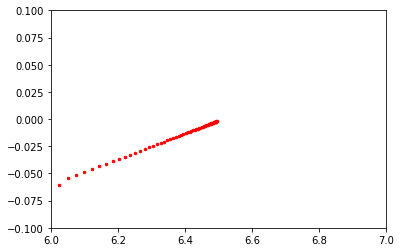



[[6.4947279 ]
 [2.02316888]]


In [4]:
#Gradient descent

from numpy import linalg as la

eta = 0.5 #step size or learning rate
m = 100 #number of instances or row entries

theta = np.random.randn(2,1) #random initialization of 
                       #the two coefficients

gradients = np.array([1,1])
e = 0.005 #tolerance
print("norm of initialized gradient = ",la.norm(gradients))
while la.norm(gradients) > e:
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    #print("gradient = ", gradients)
    theta = theta - eta*gradients
    #print(theta[0], gradients[0])
    plt.plot(theta[0], gradients[0], 'r.', ms=5)
    
plt.xlim([6,7]); plt.ylim([-0.1,0.1])
plt.show()
print("\n")
print(theta)

In [6]:
#Stochastic gradient descent

#In stochastic gradient descent, the best estimates for the 
#coefficients are calculated per entry in the data, unlike 
# in batch gradient descent. 
#Therefore, it requires much lesser iterations with the
#full dataset to determine the best estimates with the 
#desired tolerance. 

#Define # of iterations or rounds
n_epochs = 50

#number of instances in the data
m = 50

#Learning schedule parameters
t0, t1 = 5, 50

#Define learning rate, or step size, per iteration. We decrease
#the step size as we progress, to converge to a minimum. 

def learning_rate(t):
    return t0/(t+t1)

#Random initialization of the coefficients of the linear fit

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        #choose a random entry between 1 to m
        index = np.random.randint(m)
        xi = X_b[index:index+1]
        yi = y[index:index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate(epoch*m+i)
        theta = theta - eta*gradients
        
print("",  theta)

[[6.52076018]
 [2.07669845]]


In [12]:
#Stochastic gradient descent using Scikit-learn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) 
#here eta is the starting learning rate

sgd_reg.fit(x, y.ravel())
#np.ravel() returns a 1 D array. It is the same as reshape(-1)

print(sgd_reg.intercept_, sgd_reg.coef_)

[6.50122431] [1.99209489]


/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
